In [49]:
import pandas as pd
import re
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import matplotlib.gridspec as gridspec
import scipy
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from datetime import datetime, timedelta

In [130]:
# load plates: 
data1=pd.read_csv('ELISA/ELISA_plate1_020522.txt', sep='\t', header=None, skipinitialspace=True)
data1= data1.apply(lambda x: x.str.replace(',','.')).astype(float)
data2=pd.read_csv('ELISA/ELISA_plate2_020522.txt', sep='\t', header=None)
data2= data2.apply(lambda x: x.str.replace(',','.')).astype(float)
data3=pd.read_csv('ELISA/ELISA_plate3_020522.txt', sep='\t', header=None)
data3= data3.apply(lambda x: x.str.replace(',','.')).astype(float)
data1

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.280,1.427,1.226,1.089,1.059,1.290,1.393,1.057,1.371,-0.006,0.002,0.002
1,1.020,1.352,1.327,1.287,1.240,1.244,1.214,1.188,1.330,0.002,0.003,0.002
2,1.082,1.368,1.429,1.493,1.146,1.359,1.591,1.213,1.468,0.002,-0.003,0.004
3,0.841,1.143,1.215,1.083,1.214,1.389,1.463,1.408,1.569,0.002,0.002,0.005
4,1.495,1.169,1.291,1.391,1.372,1.558,1.296,1.535,1.559,0.002,-0.007,0.004
5,1.132,1.046,1.264,1.223,1.600,1.644,1.453,1.336,1.489,0.004,0.011,0.003
6,0.865,1.287,1.617,1.393,1.499,1.493,1.263,1.632,1.550,-0.007,0.002,0.004
7,1.502,1.246,1.380,1.209,1.509,1.459,1.418,1.294,1.402,0.003,0.000,0.004


In [131]:
datares1=pd.DataFrame([])
datares2=pd.DataFrame([])
datares3=pd.DataFrame([])


def mean_dilutions(df, data):

    data['serumdil1']= df.iloc[:, 0:3].mean(axis=1)
    data['serumdil2']= df.iloc[:, 3:6].mean(axis=1)
    data['serumdil3']= df.iloc[:, 6:9].mean(axis=1)
    return data

datares1=mean_dilutions(data1, datares1)
datares2=mean_dilutions(data2, datares2)
datares3=mean_dilutions(data3, datares3)

# error1= error1.append(df.iloc[:, 0:3])
#     error2= df.iloc[:, 3:6]
#     error3= df.iloc[:, 6:9]


df=pd.concat([datares1, datares2, datares3], ignore_index=True)
# error=pd.concat([error1, error2, error3], ignore_index=True).reset_index(drop=True)
# error=error[:20]
# df.index= [OC43_FL_low, 'OC43_FL_high', 'OC43']
# print(error1, error3)

#remove the pG rows
df=df.drop([20, 21,22,23], axis=0)
print(df)

    serumdil1  serumdil2  serumdil3
0    1.311000   1.146000   1.273667
1    1.233000   1.257000   1.244000
2    1.293000   1.332667   1.424000
3    1.066333   1.228667   1.480000
4    1.318333   1.440333   1.463333
5    1.147333   1.489000   1.426000
6    1.256333   1.461667   1.481667
7    1.376000   1.392333   1.371333
8    0.820000   0.755000   0.711000
9    0.822667   0.708333   0.699667
10   0.800000   0.725000   0.696000
11   0.846000   0.714667   0.708333
12   0.799667   0.721667   0.715333
13   0.798667   0.748333   0.743667
14   0.772000   0.764000   0.741000
15   2.241333   0.871667   0.716000
16   0.851667   0.929333   0.815000
17   0.772333   0.769667   0.736333
18   0.699333   0.804000   0.675333
19   0.742000   0.794667   0.719667


In [150]:
error1=pd.DataFrame([])
error2=pd.DataFrame([])
error3=pd.DataFrame([])

list_std1=[]
list_std2=[]
list_std3=[]

def errorlists(errordf, location1, location2, listname):
    errordf=errordf.append(data1.iloc[:, location1: location2])
    errordf=errordf.append(data2.iloc[:, location1: location2])
    errordf=errordf.append(data3.iloc[:, location1: location2]).reset_index(drop=True)
    errordf=errordf[:20]

    for i, row in errordf.iterrows():
        listname.append(np.std(row.to_numpy()))
    listname=np.array(listname)
    return errordf, listname

error1, list_std1=errorlists(error1, 0,3, list_std1)
print(list_std1)

error2, list_std2=errorlists(error2, 3,6, list_std2)
print(list_std2)

error3, list_std3=errorlists(error3, 6,9, list_std3)
print(list_std3)


[0.08493527 0.15095916 0.15126357 0.16202332 0.13448503 0.08965613
 0.30776759 0.10454983 0.03779771 0.03809054 0.05943624 0.05359726
 0.01376792 0.01510703 0.02687006 1.70741136 0.12303206 0.08336799
 0.13206143 0.06110646]
[0.1025573  0.02127596 0.14288068 0.12535372 0.08356368 0.1889462
 0.04861641 0.13123346 0.02299275 0.02185304 0.05555178 0.03765044
 0.02380943 0.03015884 0.00571548 0.09917101 0.0336386  0.07883034
 0.02477902 0.06276057]
[0.1534695  0.0617306  0.157423   0.06681816 0.11872751 0.06531462
 0.1582031  0.05507167 0.02342363 0.03702552 0.04233989 0.05713337
 0.06229143 0.02684937 0.06217717 0.0492409  0.01930458 0.01866071
 0.02671246 0.02743882]


In [135]:
#make df with 1 column
df_graph=pd.concat([df['serumdil1'], df['serumdil2'], df['serumdil3']], axis=0, ignore_index=True)
df_graph=pd.DataFrame(df_graph)
df_graph.columns=['serum']

print(df_graph)

df_graph, len(df)

       serum
0   1.311000
1   1.233000
2   1.293000
3   1.066333
4   1.318333
5   1.147333
6   1.256333
7   1.376000
8   0.820000
9   0.822667
10  0.800000
11  0.846000
12  0.799667
13  0.798667
14  0.772000
15  2.241333
16  0.851667
17  0.772333
18  0.699333
19  0.742000
20  1.146000
21  1.257000
22  1.332667
23  1.228667
24  1.440333
25  1.489000
26  1.461667
27  1.392333
28  0.755000
29  0.708333
30  0.725000
31  0.714667
32  0.721667
33  0.748333
34  0.764000
35  0.871667
36  0.929333
37  0.769667
38  0.804000
39  0.794667
40  1.273667
41  1.244000
42  1.424000
43  1.480000
44  1.463333
45  1.426000
46  1.481667
47  1.371333
48  0.711000
49  0.699667
50  0.696000
51  0.708333
52  0.715333
53  0.743667
54  0.741000
55  0.716000
56  0.815000
57  0.736333
58  0.675333
59  0.719667


(       serum
 0   1.311000
 1   1.233000
 2   1.293000
 3   1.066333
 4   1.318333
 5   1.147333
 6   1.256333
 7   1.376000
 8   0.820000
 9   0.822667
 10  0.800000
 11  0.846000
 12  0.799667
 13  0.798667
 14  0.772000
 15  2.241333
 16  0.851667
 17  0.772333
 18  0.699333
 19  0.742000
 20  1.146000
 21  1.257000
 22  1.332667
 23  1.228667
 24  1.440333
 25  1.489000
 26  1.461667
 27  1.392333
 28  0.755000
 29  0.708333
 30  0.725000
 31  0.714667
 32  0.721667
 33  0.748333
 34  0.764000
 35  0.871667
 36  0.929333
 37  0.769667
 38  0.804000
 39  0.794667
 40  1.273667
 41  1.244000
 42  1.424000
 43  1.480000
 44  1.463333
 45  1.426000
 46  1.481667
 47  1.371333
 48  0.711000
 49  0.699667
 50  0.696000
 51  0.708333
 52  0.715333
 53  0.743667
 54  0.741000
 55  0.716000
 56  0.815000
 57  0.736333
 58  0.675333
 59  0.719667,
 20)

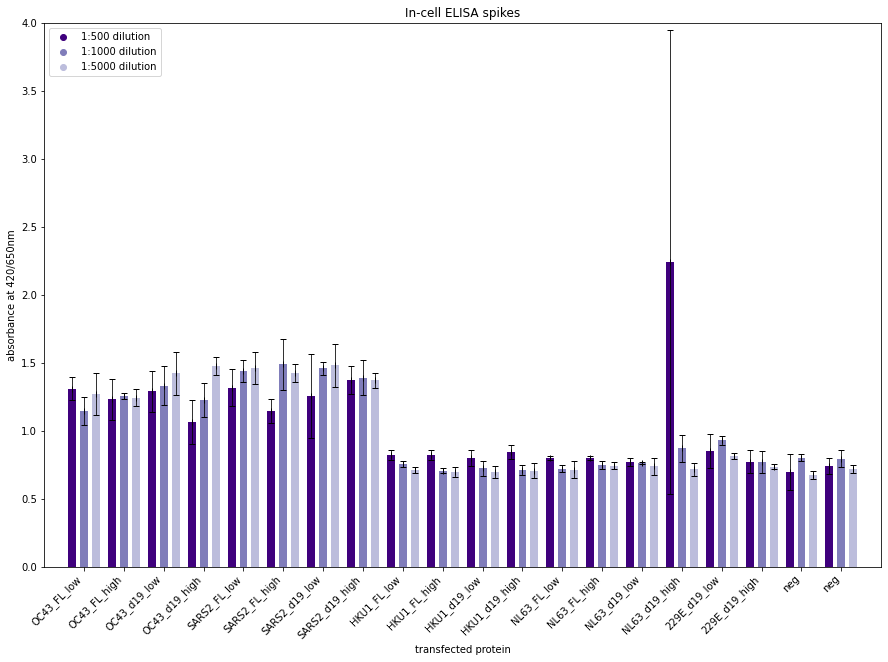

In [163]:
# make figure with all timepoints
fig = plt.figure(constrained_layout=False, figsize=(15, 10))
widths = [11, 11]
# heights= [5, 5]
spec = fig.add_gridspec(ncols=1, nrows=1, wspace=0.08) #width_ratios=widths

ax = fig.add_subplot(spec[0, 0])

prex = np.array(range(len(df)))
# array1= np.array(x)
# sub1= [0.2]*len(df)

# x=df_graph.index
#labels depending on order of ELISA
ticklabels=['OC43_FL_low', 'OC43_FL_high', 'OC43_d19_low', 'OC43_d19_high', 'SARS2_FL_low', "SARS2_FL_high", 'SARS2_d19_low', 'SARS2_d19_high', 
                    'HKU1_FL_low', 'HKU1_FL_high', 'HKU1_d19_low', 'HKU1_d19_high', 'NL63_FL_low', 'NL63_FL_high', 'NL63_d19_low', 'NL63_d19_high', 
                    '229E_d19_low', '229E_d19_high', 'neg', 'neg']

x = np.subtract(prex, 0.3)
ax.bar(x,df['serumdil1'], width=0.2, color='#3f007d')
ax.errorbar(x, y=df['serumdil1'].values,  yerr=list_std1, fmt='|', capsize=3, ecolor='black', mfc='black', mec='black', lw=0.8)
x = np.subtract(prex, 0)
ax.bar(x,df['serumdil2'], width=0.2, color='#807dba', tick_label=ticklabels)
ax.errorbar(x, y=df['serumdil2'].values,  yerr=list_std2, fmt='|', capsize=3, ecolor='black', mfc='black', mec='black', lw=0.8)
x = np.subtract(prex, -0.3)
ax.bar(x,df['serumdil3'], width=0.2, color='#bcbddc')
ax.errorbar(x, y=df['serumdil3'].values,  yerr=list_std3, fmt='|', capsize=3, ecolor='black', mfc='black', mec='black', lw=0.8)

ax.set_xlim(-1, 20)
ax.set_ylim(0, 4)
ax.set_title('In-cell ELISA spikes')
ax.set_xlabel('transfected protein')
ax.set_ylabel('absorbance at 420/650nm')
ax.set_xticklabels(ticklabels, rotation='45', ha='right') 

legend_elements = [Line2D([0], [0], marker='o', color='#3f007d', label='1:500 dilution', lw=0),
                   Line2D([0], [0], marker='o', color='#807dba', label='1:1000 dilution', lw=0),
                   Line2D([0], [0], marker='o', color='#bcbddc', label='1:5000 dilution', lw=0)]

# # Create the figure
ax.legend(handles=legend_elements, loc='upper left')
plt.show
plt.savefig("31052022_ELISA_res.png", dpi=330, bbox_inches='tight')


In [164]:
# for pG figure






df=pd.concat([datares1, datares2, datares3], ignore_index=True)
# df.index= [OC43_FL_low, 'OC43_FL_high', 'OC43']


#remove the pG rows
df=df.drop(list(range(0,20)), axis=0)
print(df)

    serumdil1  serumdil2  serumdil3
20   0.005333   0.003000   0.003000
21   0.004000   0.003667   0.002667
22   0.003000   0.003333   0.002667
23   0.003000   0.003000   0.002667


In [167]:
error1=pd.DataFrame([])
error2=pd.DataFrame([])
error3=pd.DataFrame([])

list_std1=[]
list_std2=[]
list_std3=[]

def errorlists(errordf, location1, location2, listname):
    errordf=errordf.append(data1.iloc[:, location1: location2])
    errordf=errordf.append(data2.iloc[:, location1: location2])
    errordf=errordf.append(data3.iloc[:, location1: location2]).reset_index(drop=True)
    errordf=errordf[20:]

    for i, row in errordf.iterrows():
        listname.append(np.std(row.to_numpy()))
    listname=np.array(listname)
    return errordf, listname

error1, list_std1=errorlists(error1, 0,3, list_std1)
print(list_std1)

error2, list_std2=errorlists(error2, 3,6, list_std2)
print(list_std2)

error3, list_std3=errorlists(error3, 6,9, list_std3)
print(list_std3)


[2.49443826e-03 0.00000000e+00 8.16496581e-04 4.33680869e-19]
[4.33680869e-19 4.71404521e-04 9.42809042e-04 1.41421356e-03]
[4.33680869e-19 4.71404521e-04 4.71404521e-04 4.71404521e-04]


In [168]:
#make df with 1 column
df_graph=pd.concat([df['serumdil1'], df['serumdil2'], df['serumdil3']], axis=0, ignore_index=True)
df_graph=pd.DataFrame(df_graph)
df_graph.columns=['serum']


df_graph

,serum
0,0.005333
1,0.004000
2,0.003000
3,0.003000
4,0.003000
5,0.003667
6,0.003333
7,0.003000
8,0.003000
9,0.002667


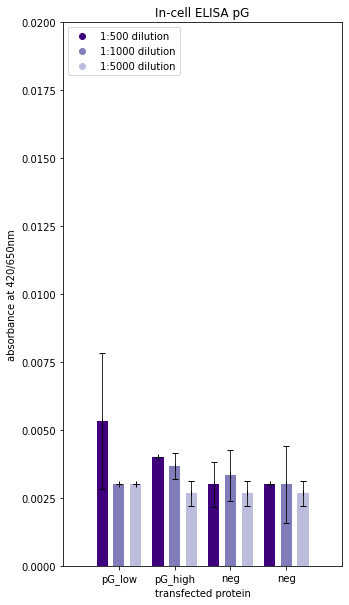

In [173]:
# make figure with all timepoints
fig = plt.figure(constrained_layout=False, figsize=(5, 10))
widths = [11, 11]
# heights= [5, 5]
spec = fig.add_gridspec(ncols=1, nrows=1, wspace=0.08) #width_ratios=widths

ax = fig.add_subplot(spec[0, 0])

prex = np.array(range(len(df)))
# array1= np.array(x)
# sub1= [0.2]*len(df)

# x=df_graph.index
#labels depending on order of ELISA
ticklabels=['pG_low', 'pG_high', 'neg', 'neg']


y=df_graph['serum']
x = np.subtract(prex, 0.3)
ax.bar(x,df['serumdil1'], width=0.2, color='#3f007d')
ax.errorbar(x, y=df['serumdil1'].values,  yerr=list_std1, fmt='|', capsize=3, ecolor='black', mfc='black', mec='black', lw=0.8)
x = np.subtract(prex, 0)
ax.bar(x,df['serumdil2'], width=0.2, color='#807dba', tick_label=ticklabels)
ax.errorbar(x, y=df['serumdil2'].values,  yerr=list_std2, fmt='|', capsize=3, ecolor='black', mfc='black', mec='black', lw=0.8)
x = np.subtract(prex, -0.3)
ax.bar(x,df['serumdil3'], width=0.2, color='#bcbddc')
ax.errorbar(x, y=df['serumdil3'].values,  yerr=list_std3, fmt='|', capsize=3, ecolor='black', mfc='black', mec='black', lw=0.8)
ax.set_xlim(-1, 4)
ax.set_ylim(0, 0.02)
ax.set_title('In-cell ELISA pG')
ax.set_xlabel('transfected protein')
ax.set_ylabel('absorbance at 420/650nm')
# ax.set_xticklabels(ticklabels, rotation='45', ha='right') 

legend_elements = [Line2D([0], [0], marker='o', color='#3f007d', label='1:500 dilution', lw=0),
                   Line2D([0], [0], marker='o', color='#807dba', label='1:1000 dilution', lw=0),
                   Line2D([0], [0], marker='o', color='#bcbddc', label='1:5000 dilution', lw=0)]

# # Create the figure
ax.legend(handles=legend_elements, loc='upper left')
plt.show
# plt.savefig("31052022_ELISA_res_pG_small_scaled.png", dpi=330, bbox_inches='tight')
